# 病例自动诊断分析

数据来自“威斯康星乳腺癌数据库”

**包含的数据段：**

ID：病例的ID

diagnosis：诊断结果M为恶性，B为良性

radius(半径), texture(问你), perimeter(周长),area(面积), smoothness(平滑度), compactness(紧凑度), concavity(凹面),concave points(凹点), symmetry(对称性), fractal_dimension(分形维数),为以上10个特征也提供了3中统计量，分别是均值，标准差和最大值

## 数据预处理

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
bc_data=pd.read_csv('bc_data.csv',header=0)
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
bc_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
bc_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
bc_data.shape

(569, 32)

In [6]:
data = bc_data.drop(['id'],axis=1)

In [7]:
#对diagnosis判断是否有除了m或者b的异常值
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
#查看是否有缺失值
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_worst             False
fractal_di

In [9]:
#没有缺失值，查看数字类型
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#看样本是否存在不均衡的情况
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
x_data=data.drop(['diagnosis'],axis=1)
x_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y_data=np.ravel(data[['diagnosis']]) #将多维数据展开成为一位数组
y_data[0:6]

array(['M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

## 1.使用KNN完成预测

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=1,test_size=0.25)
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.00000,426.000000,426.000000,426.000000,426.000000
mean,14.119505,19.332042,91.925399,656.126056,0.096463,0.104576,0.088522,0.048831,0.180741,0.062813,...,16.301629,25.673357,107.488521,889.164085,0.132227,0.25525,0.270066,0.114624,0.287711,0.083847
std,3.603518,4.354634,24.841210,361.589181,0.013814,0.050997,0.079614,0.039111,0.027155,0.006788,...,4.990770,6.276008,34.609333,593.061036,0.022234,0.15443,0.204009,0.066714,0.057732,0.016869
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.050240,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.02729,0.000000,0.000000,0.156600,0.055210
25%,11.632500,16.187500,74.667500,412.625000,0.086720,0.065815,0.028615,0.019787,0.162000,0.058112,...,12.857500,21.037500,83.150000,506.450000,0.117650,0.14755,0.108950,0.064342,0.250050,0.071960
50%,13.280000,18.810000,86.110000,544.050000,0.096425,0.096790,0.061400,0.033700,0.179400,0.061740,...,14.845000,25.185000,97.140000,677.600000,0.131600,0.21810,0.230000,0.098855,0.281100,0.080210
75%,15.832500,21.817500,104.025000,787.050000,0.105375,0.130475,0.132050,0.074030,0.194575,0.066075,...,18.707500,29.832500,125.050000,1065.000000,0.144900,0.34160,0.382400,0.165775,0.315250,0.092053
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.286700,0.426800,0.201200,0.304000,0.095750,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.93790,1.170000,0.291000,0.577400,0.148600


In [14]:
x_train.shape

(426, 30)

In [15]:
x_test.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,14.150490,19.163357,92.099021,651.204196,0.096053,0.103642,0.089626,0.049182,0.182416,0.062752,...,16.172552,25.688741,106.584056,855.020280,0.132792,0.251332,0.278513,0.114554,0.297120,0.084241
std,3.287913,4.149603,22.689816,322.546893,0.014831,0.058072,0.080310,0.038003,0.028232,0.007842,...,4.345157,5.763533,30.511048,493.055082,0.024605,0.166221,0.222435,0.062946,0.072582,0.021285
min,7.691000,10.380000,48.340000,170.400000,0.068280,0.031160,0.000000,0.000000,0.136500,0.049960,...,8.678000,14.200000,54.490000,223.600000,0.087740,0.051310,0.000000,0.000000,0.156500,0.055040
25%,11.820000,16.170000,76.525000,432.850000,0.085305,0.062265,0.031605,0.021760,0.161050,0.057330,...,13.265000,21.490000,86.215000,538.500000,0.114250,0.146850,0.123600,0.065050,0.251350,0.070900
50%,13.500000,18.900000,86.910000,563.000000,0.093730,0.083480,0.061550,0.033410,0.178400,0.061210,...,15.140000,25.990000,99.000000,711.200000,0.129600,0.204300,0.224900,0.105600,0.284400,0.079190
75%,15.740000,21.510000,104.700000,767.600000,0.105000,0.130150,0.122200,0.070495,0.201100,0.066385,...,18.800000,29.485000,126.400000,1091.500000,0.147800,0.315300,0.384950,0.156350,0.323150,0.092095
max,27.220000,33.810000,182.100000,2250.000000,0.142500,0.345400,0.375400,0.187800,0.290600,0.097440,...,33.120000,41.780000,220.800000,3216.000000,0.209800,1.058000,1.252000,0.268800,0.663800,0.207500


In [16]:
x_test.shape

(143, 30)

In [17]:
from sklearn.preprocessing import StandardScaler
#均值归一化处理
means_normal=StandardScaler()
means_normal.fit(x_train) #均值为0 ，标准差为1的分布
x_train_normal=means_normal.transform(x_train)
x_train_normal

array([[ 0.30575375,  2.59521918,  0.46246107, ...,  1.81549702,
         2.10164609,  3.38609913],
       [ 0.23351721, -0.05334893,  0.20573083, ...,  0.5143837 ,
         0.14721854,  0.05182385],
       [ 0.15572401,  0.18345881,  0.11343692, ...,  0.69446859,
         0.263409  , -0.10011179],
       ...,
       [ 0.85586279,  1.19276558,  0.89773369, ...,  1.12967374,
         0.75591781,  2.97065009],
       [-0.02486734,  0.44095848, -0.08606303, ..., -0.52515632,
        -1.1291423 , -0.45561747],
       [-0.30270019, -0.20968802, -0.37543871, ..., -0.967865  ,
        -1.54361274, -1.31500348]], shape=(426, 30))

In [18]:
x_test_normal = means_normal.transform(x_test)
x_test_normal

array([[ 0.15850234, -1.23049032,  0.25369143, ..., -0.05738582,
        -0.08689656,  0.48863884],
       [-0.2638036 , -0.15450952, -0.23961754, ...,  1.41330744,
         1.77388495,  2.02105229],
       [-0.32492682, -0.76147305, -0.35407811, ..., -0.1354226 ,
         0.87210827,  0.71179432],
       ...,
       [ 0.25852216, -0.06024625,  0.21500053, ..., -0.03937733,
        -1.03202789, -0.84910706],
       [ 1.46709506,  0.95825694,  1.49824869, ...,  0.62693676,
         0.07438274, -0.45739797],
       [-0.61942964,  0.42256565, -0.6261235 , ..., -0.48013509,
         0.34318156, -0.6134881 ]], shape=(143, 30))

In [19]:
from sklearn.neighbors import KNeighborsClassifier
mymodel=KNeighborsClassifier(algorithm='kd_tree',
                             leaf_size=30,
                             metric='minkowski',
                             n_jobs=None,
                             n_neighbors=5,
                             p=2,
                             weights='uniform')
mymodel.fit(x_train,y_train)
y_pre = mymodel.predict(x_test)
y_pre

array(['M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B'],
      dtype=object)

In [20]:
mymodel.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pre)

0.9370629370629371

In [22]:
import matplotlib.pyplot as plt
NumberOfNeighbors = range(1,23)
KNNs=[KNeighborsClassifier(n_neighbors=i)for i in NumberOfNeighbors]
range(len(KNNs)) #遍历 KNNs 列表中的每个元素的索引

range(0, 22)

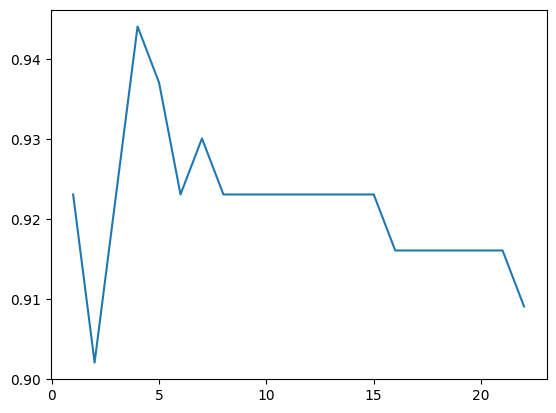

In [23]:
scores = [KNNs[i].fit(x_train,y_train).score(x_test,y_test)for i in range(len(KNNs))]
plt.plot(NumberOfNeighbors,scores)

In [24]:
mymodel=KNeighborsClassifier(algorithm='kd_tree',
                             leaf_size=30,
                             metric='minkowski',  #明可夫斯基距离
                             n_jobs=None,
                             n_neighbors=4,
                             p=2,  #欧氏距离
                             weights='uniform')
mymodel.fit(x_train,y_train)
y_pre = mymodel.predict(x_test)
y_pre

array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B'],
      dtype=object)

In [25]:
y_predictset=mymodel.predict(x_test.loc[[421]])
y_predictset

array(['B'], dtype=object)

In [26]:
accuracy_score(y_test,y_pre)

0.9440559440559441

可以看到准确率为0.944，进行调优将他优化

## 模型调优：利用pca

In [27]:
#计算相关矩阵
# 将 'diagnosis' 列转换为数值型
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
correlations = data.corr()
# 查看目标变量 'diagnosis' 与其他特征的相关性
target_corr = correlations['diagnosis'].sort_values(ascending=False)
target_corr

diagnosis                  1.000000
concave_points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [28]:
threshold = 0.3
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
selected_features.remove('diagnosis')  # 移除目标变量本身
print("Selected features:", selected_features)

# 使用选择的特征重新构建特征数据
x_data_selected = x_data[selected_features]
x_data_selected.shape[1]

Selected features: ['concave_points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst']


23

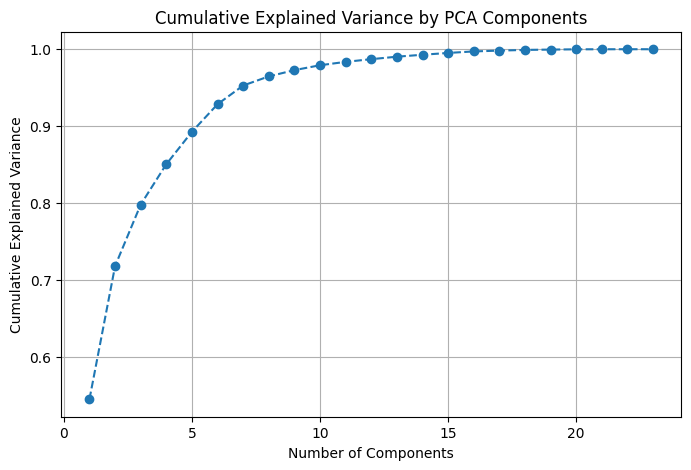

In [29]:
#pca降维

# 标准化数据
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data_selected)

# 应用 PCA
n_components = 23 # 选择保留的主成分数量
pca = PCA(n_components=n_components)
x_data_pca = pca.fit_transform(x_data_scaled)

# 获取解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_
# 计算累积解释方差
cumulative_explained_variance = explained_variance_ratio.cumsum()

# 绘制累积解释方差图
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

看图在等于10的时候开始趋于平缓，所以选择10个主成分

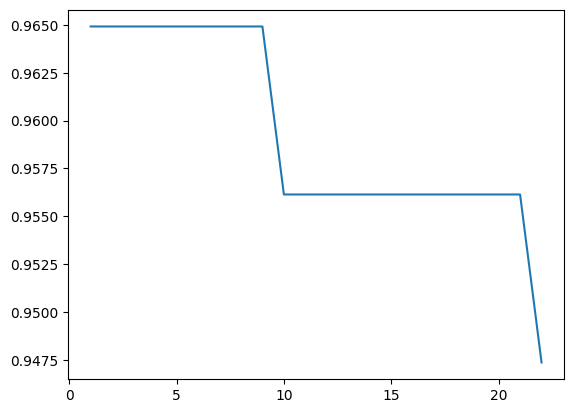

In [30]:
#选择10个主成分
n_components = 10  # 选择保留的主成分数量
pca = PCA(n_components=n_components)
x_data_pca = pca.fit_transform(x_data_scaled)
# 分割数据集
x_train, x_test, y_train, y_test = train_test_split(x_data_pca, y_data, test_size=0.2, random_state=42)
NumberOfNeighbors = range(1,23)
KNNs=[KNeighborsClassifier(n_neighbors=i)for i in NumberOfNeighbors]
scores = [KNNs[i].fit(x_train,y_train).score(x_test,y_test)for i in range(len(KNNs))]
plt.plot(NumberOfNeighbors,scores)

看图选择k=5

In [31]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9649122807017544

这个时候达到了0.965，比刚刚上升了2%左右

可以试试逻辑回归算法准确率是否会更加高

## 逻辑回归预测模型

重新分割y_data和x_data 

In [32]:
data = bc_data.drop(['id'],axis=1)

In [33]:
x_data=data.drop(['diagnosis'],axis=1)
x_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y_data=np.ravel(data[['diagnosis']]) #将多维数据展开成为一位数组
y_data = np.where(y_data == 'M', 0, 1)
y_data[0:6]

array([0, 0, 0, 0, 0, 0])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=42,test_size=0.3)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
#模型训练
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [37]:
#使用默认参数
y_pre=model.predict(x_test_scaled)
y_pre

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

### 模型评价

利用混淆矩阵分类算法的指标进行模型评测

In [38]:
#混淆矩阵
from sklearn import metrics
matrix=metrics.confusion_matrix(y_test,y_pre)
matrix

array([[ 62,   1],
       [  2, 106]])

In [39]:
#准确度
print('Accuracy:',metrics.accuracy_score(y_test,y_pre))
#精度
print('Precision:',metrics.precision_score(y_test,y_pre))

Accuracy: 0.9824561403508771
Precision: 0.9906542056074766


有非常明显的提升，现在进行模型的调参，看能否更进一步

## 模型调参

pca降维

In [40]:
pca = PCA(n_components=0.95)  # 保留95%的方差
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [41]:
model_pca = LogisticRegression(C=1, penalty='l2', solver='lbfgs', max_iter=1000)
model_pca.fit(x_train_pca, y_train)
y_pre_pca = model_pca.predict(x_test_pca)

In [42]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pre_pca))
print('Precision:', metrics.precision_score(y_test, y_pre_pca))

Accuracy: 0.9941520467836257
Precision: 0.9908256880733946


### 可以看到有了很大很大的提升

# 总结

初始knn算法准确率：0.9370629370629371

对knn的k值进行看图调参之后的准确率：0.9440559440559441

利用pca降维之后的knn算法准确率：0.9649122807017544

初始逻辑回归算法的准确率： 0.9824561403508771

                精确率：0.9906542056074766

利用pca调优后的逻辑回归算法的准确率